<a href="https://colab.research.google.com/github/DataBook4U/NFT_Project/blob/master/NFTsTwitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install snscrape
!pip install scipy
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 5.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00


In [13]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [6]:
data = pd.read_csv('/Data.csv')

In [7]:
df = pd.DataFrame(data)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44806 entries, 0 to 44805
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44806 non-null  int64 
 1   Date        44806 non-null  object
 2   User        44806 non-null  object
 3   Tweet       44806 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


In [14]:
df_nft = df[df['Tweet'].str.contains("NFT")]
tweets_nft = df_nft['Tweet'].tolist()

sentiments = []

for tweet in tweets_nft:
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)

    # load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
output = model(**encoded_tweet)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)

Negative 0.051429953
Neutral 0.89769363
Positive 0.05087653


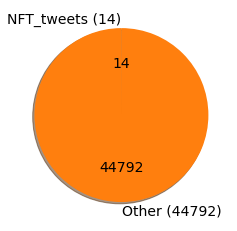

In [15]:
# Plotting the small amount of NFT tweets among the total scrapped amount:

total_entries = 44806
interesting_entries = 14
other_entries = total_entries - interesting_entries

# Create a pie chart
labels = ['NFT_tweets ({})'.format(interesting_entries), 'Other ({})'.format(other_entries)]
sizes = [interesting_entries, other_entries]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: '{:.0f}'.format(pct * total_entries / 100),
        textprops={'fontsize': 14}, shadow=True, startangle=90)

# Display the chart
plt.show()